In [22]:
import numpy as np

## Inside a numpy array

### Dimensions

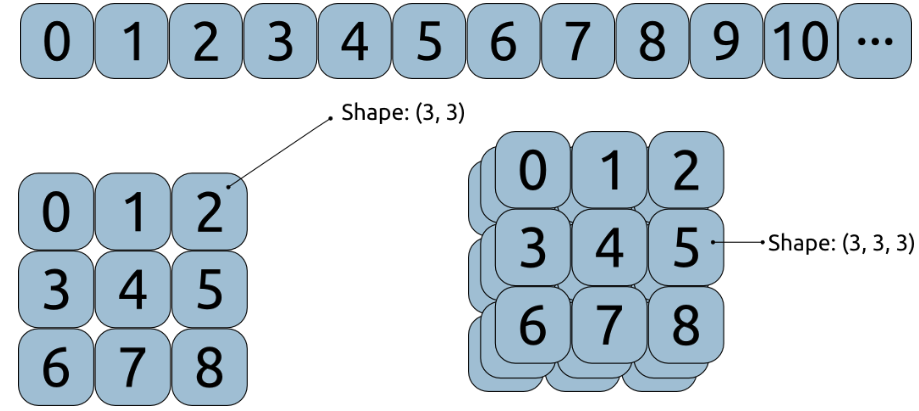

In [25]:
a = np.random.randint(low=1, high=10, size=(3, 3))
print(a)

[[7 8 3]
 [8 5 3]
 [3 2 1]]


In [26]:
def print_info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('shape:', a.shape)
    print('data type:', a.dtype) #int, float, boolean
    
print_info(a)

number of elements: 9
number of dimensions: 2
shape: (3, 3)
data type: int64


## Broadcasting

In numpy, broadcasting is a powerful mechanism that allows arrays of different shapes to be combined together in arithmetic operations. It enables efficient computation and avoids the need for explicit loops or creation of large intermediate arrays

In [52]:
x = np.arange(4)
print(x)
print('Easy', x + 3)

newx = x.copy()
for i in np.arange(x.size):
    newx[i] = newx[i] + 3
print('Dumb', newx)

newx = np.ones_like(x)*3
x = x + newx
print('Dumb', x)

[0 1 2 3]
Easy [3 4 5 6]
Dumb [3 4 5 6]
Dumb [3 4 5 6]


We can think of broadcasting as an operation that stretches or duplicates the value 3 into the array [3, 3, 3, 3], and adds the results. The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

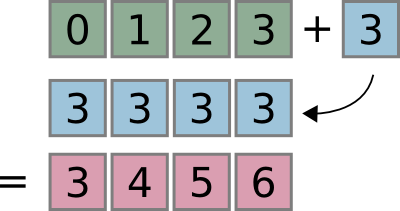

## 2D broadcasting

In [44]:
a = np.array([1, 2, 3])   # shape: (3,)
b = np.array([[4, 5, 6], [7, 8, 9]])   # shape: (2, 3)

print(a.shape)
print(a)
print()
print(b.shape)
print(b)

(3,)
[1 2 3]

(2, 3)
[[4 5 6]
 [7 8 9]]


In [50]:
print('Easy')
print(a + b)

print()

print('Dumb')
for i in b:
    print(i + a)

Easy
[[ 5  7  9]
 [ 8 10 12]]

Dumb
[5 7 9]
[ 8 10 12]


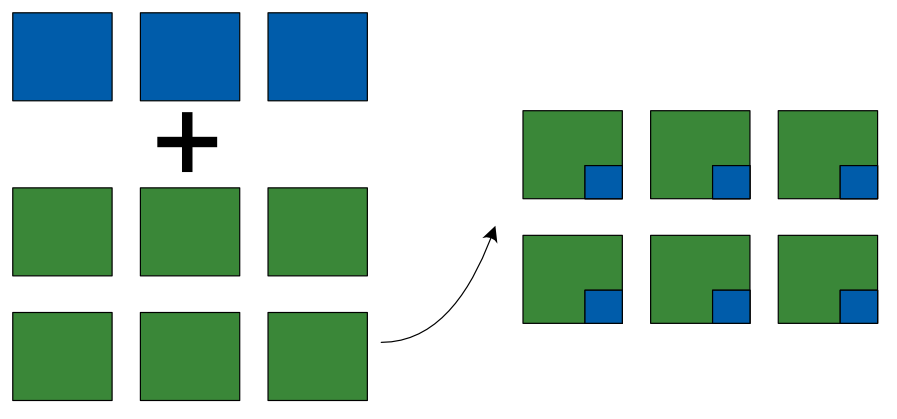

## Rules of Broadcasting
 ```When operating on two arrays, NumPy compares their shapes element-wise. The broadcasting rules are straightforward: compare dimensions, starting from the last. Match when either dimension is one or ``None``, or if dimensions are equal ```

Broadcasting in NumPy follows a strict set of rules to determine the interaction between two arrays

Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

### Broadcasting example 1

#### Rule 1: (Padding) If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side

In [58]:
a = np.array([1, 2, 3])   # shape: (3,)
b = np.array([[4, 5, 6], [7, 8, 9]])   # shape: (2, 3)

print(a.shape)
print()
print(b.shape)

(3,)

(2, 3)


We see by rule 1 that the array a has fewer dimensions, so we pad it on the left with ones:

a.shape -> (1, 3)

b.shape -> (2, 3)

#### Rule 2: (Stretching) If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched or "broadcast" to match the other shape.

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension in a to match:

a.shape -> (2, 3)

b.shape -> (2, 3)

The shapes match, and we see that the final shape will be (2, 3)

In [59]:
(a+b).shape

(2, 3)

### Broadcasting example 2

In [ ]:
a = np.array([1, 2, 3])[:, np.newaxis]
b = np.array([[4, 5, 6], [7, 8, 9]])

In [62]:
print(a.shape)
print()
print(b.shape)

(3, 1)

(3,)


In [63]:
(a+b).shape

(3, 3)

### Broadcasting example 3

In [67]:
a = np.ones((3, 2))
b = np.array([4, 5, 6])

In [68]:
print(a.shape)
print()
print(b.shape)

(3, 2)

(3,)


In [70]:
(a+b).shape

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

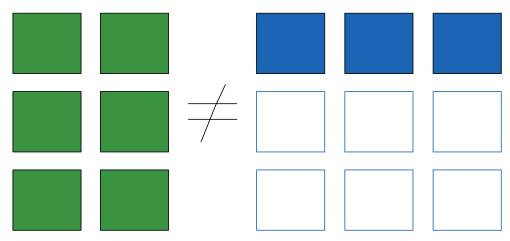

#### Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

you could imagine making a and b compatible by, say, padding b's shape with ones on the right rather than the left. But this is not how the broadcasting rules work! That sort of flexibility might be useful in some cases, but it would lead to potential areas of ambiguity. If right-side padding is what you'd like, you can do this explicitly by reshaping the array 

In [133]:
a = np.ones((3, 2))
b = np.array([4, 5, 6])[:, np.newaxis]
# b = np.array([4, 5, 6]).reshape((3, 1))

In [134]:
print(a.shape)
print()
print(b.shape)

(3, 2)

(3, 1)


In [135]:
(a+b).shape

(3, 2)

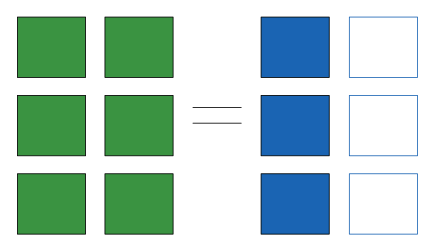

### Broadcasting example 4

These broadcasting rules apply to any binary ufunc

In [96]:
a = np.ones(3)
(a/3).shape

(3,)

### Broadcasting Examples 5
This can be translated to any number of dimensions

```
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3
```

```
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5
```

### Recap

```
Scalar    2D           3D           Bad

( ,)     (3, 4)     (3, 5, 1)    (3, 5, 2)
(3,)     (3, 1)     (      8)    (      8)
----     ------     ---------    ---------
(3,)     (3, 4)     (3, 5, 8)       XXX
```

## Broadcasting exercises

### Exercise1: warm up

```What is the expected output shape for each operation?```

In [117]:
a = np.arange(5)
b = 5

(a-b) #Shape?

(5,)

In [128]:
a = np.ones((7, 1))
b = np.arange(7)

(a*b) #Shape? 

(7, 7)

In [121]:
a = np.arange(3).reshape((3, 1))
b = np.arange(1, 5)

(a/b) #Shape?

(3, 4)

### Exercise 2:

```
1. Create a 2D array of dimension (5, 3)
2. Calculate the maximum value of each row
3. Divide each row by its maximum
```

In [130]:
a = np.random.randint(1, 10, (5, 3))
m = np.max(a, 1)
print(a)
print()
print(m)

[[4 8 2]
 [8 2 7]
 [6 7 6]
 [6 9 9]
 [9 4 8]]

[8 8 7 9 9]


In [131]:
print(a.shape)
print(m.shape)

(5, 3)
(5,)


### Exercise 3

``` Find the closest cluster where the observation belongs ```

In [209]:
observation = np.array([30, 99])
clusters = np.array([[102.0, 203.0],
             [132.0, 193.0],
            [45.0, 155.0], 
            [57.0, 173.0]])

cluster 0
cluster 1
cluster 2
cluster 3


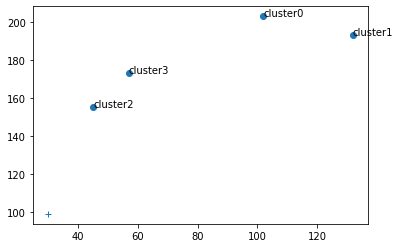

In [210]:
import matplotlib.pyplot as plt
plt.scatter(clusters[:, 0], clusters[:, 1])
for n, x in enumerate(clusters):
    print('cluster %d' %n)
    plt.annotate('cluster%d' %n, (x[0], x[1]))
plt.plot(observation[0], observation[1], '+')

**hint:** Find the distance between the observation and each row in the cluster. The cluster in which the observation belongs to is the row with the minimum distance.

distance = $\sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2 }$

In [221]:
diff = observation-clusters
dist = np.sqrt(np.sum(diff**2, axis=1))
np.argmin(dist)

2